# Prac 05

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

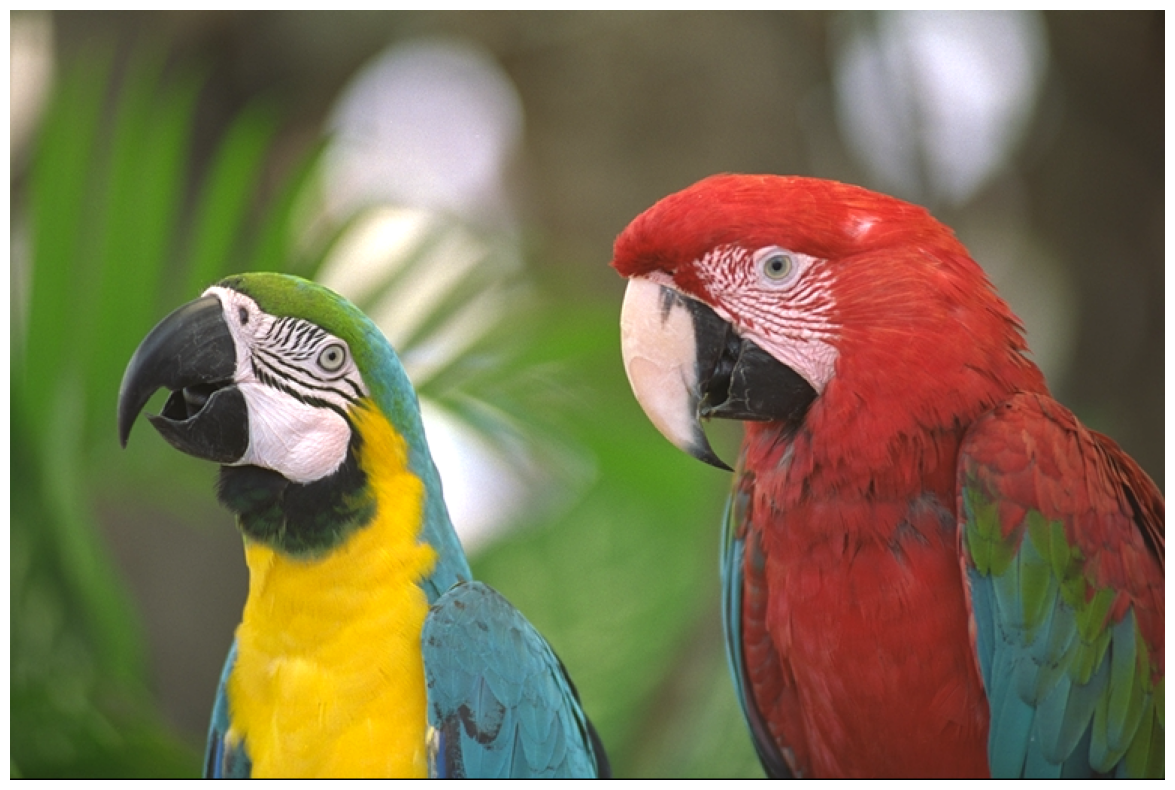

In [2]:
# Load image
img = cv2.imread('kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img); plt.axis('off')

Let's start with gray tones first.

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [4]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img, dtype=np.float32)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]  # shape (3,)

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors - pixel[None, :]            # (4,3)
        dists = np.sum(diffs*diffs, axis=1)        # (4,)
        idx = np.argmin(dists)
        new_pixel = colors[idx]                    # (3,)

        # Apply quantization
        quantized[r, c, :] = new_pixel

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

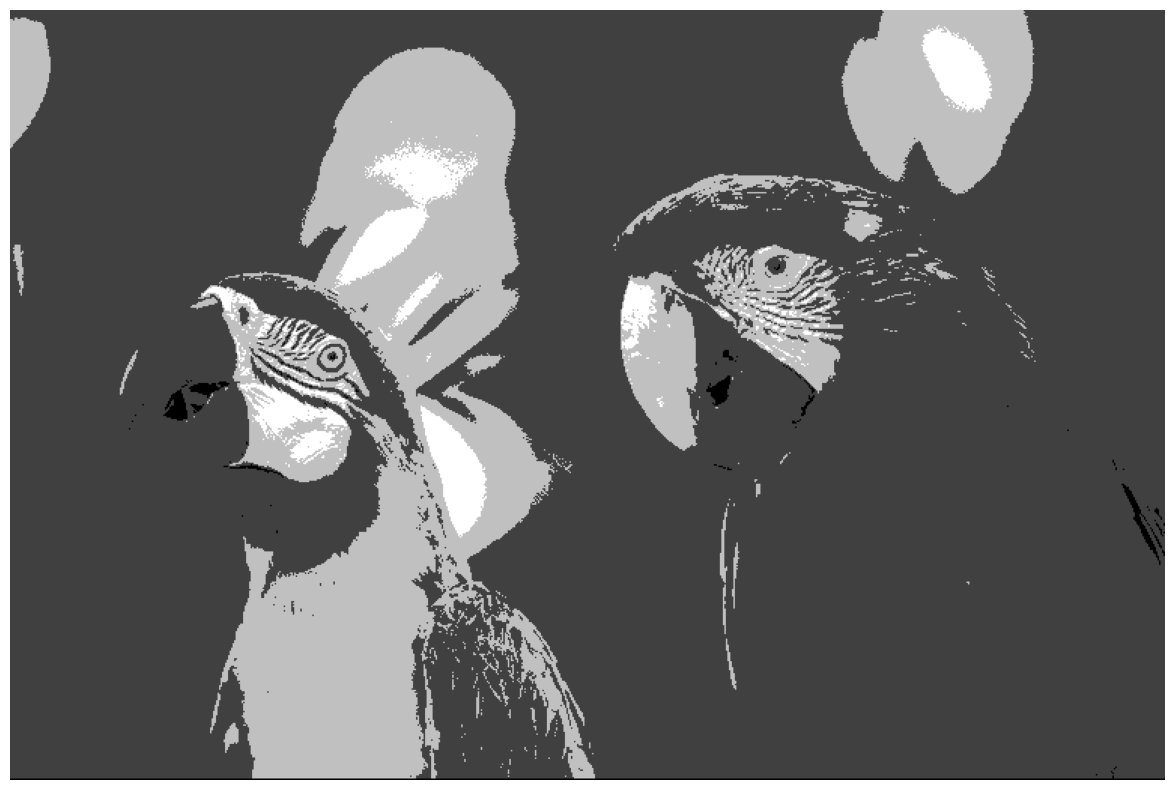

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8)); plt.axis('off')

In [6]:
# Compute average quantization error (average Euclidean error per pixel)
avg_quant_error = float(np.mean(np.linalg.norm(img - quantized, axis=2)))
print('Average quantization error:', avg_quant_error)

Average quantization error: 67.73236083984375


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [7]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors - pixel[None, :]
        dists = np.sum(diffs*diffs, axis=1)
        idx = np.argmin(dists)
        new_pixel = colors[idx]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r,   c+1, :] = np.clip(img_tmp[r,   c+1, :] + quant_error * (7/16.0), 0, 255)
        img_tmp[r+1, c-1, :] = np.clip(img_tmp[r+1, c-1, :] + quant_error * (3/16.0), 0, 255)
        img_tmp[r+1, c,   :] = np.clip(img_tmp[r+1, c,   :] + quant_error * (5/16.0), 0, 255)
        img_tmp[r+1, c+1, :] = np.clip(img_tmp[r+1, c+1, :] + quant_error * (1/16.0), 0, 255)

        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: title={'center': 'Floyd–Steinberg dithering'}>,
 Text(0.5, 1.0, 'Floyd–Steinberg dithering'),
 (np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5)))

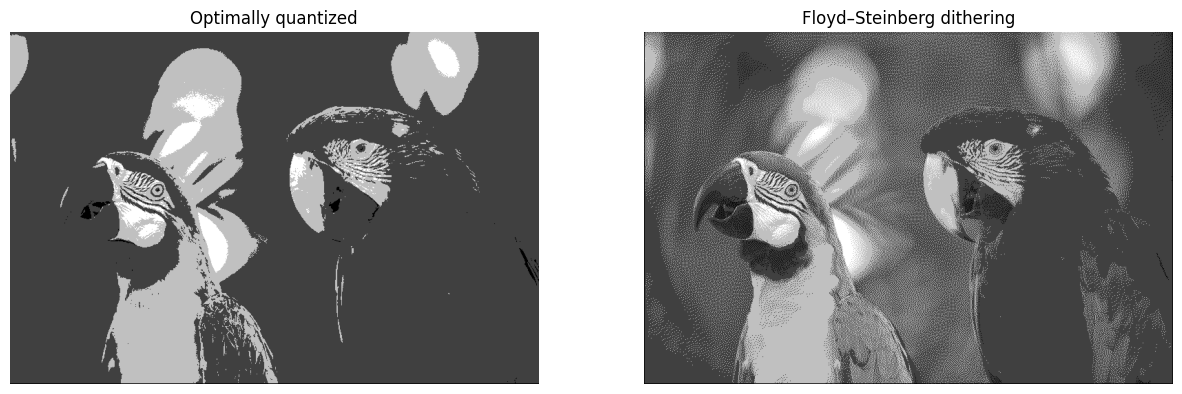

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)), plt.title('Optimally quantized'), plt.axis('off')
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)), plt.title('Floyd–Steinberg dithering'), plt.axis('off')

In [9]:
# Compute average quantization error for dithered image
avg_dith_error = float(np.mean(np.linalg.norm(img - dithering, axis=2)))
print('Average dithering error:', avg_dith_error)

Average dithering error: 80.74153137207031


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

 ## black and white

In [10]:
# 2-color palette: black & white
colors_bw = np.array([[0, 0, 0],
                      [255, 255, 255]], dtype=np.float32)

In [11]:
quantized_bw = np.zeros_like(img, dtype=np.float32)
for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        diffs = colors_bw - pixel[None, :]
        dists = np.sum(diffs*diffs, axis=1)
        new_pixel = colors_bw[np.argmin(dists)]
        quantized_bw[r, c, :] = new_pixel

In [12]:
avg_quant_error_bw = float(np.mean(np.linalg.norm(img - quantized_bw, axis=2)))
print('Avg quantization error (B/W):', avg_quant_error_bw)

Avg quantization error (B/W): 152.54225158691406


(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

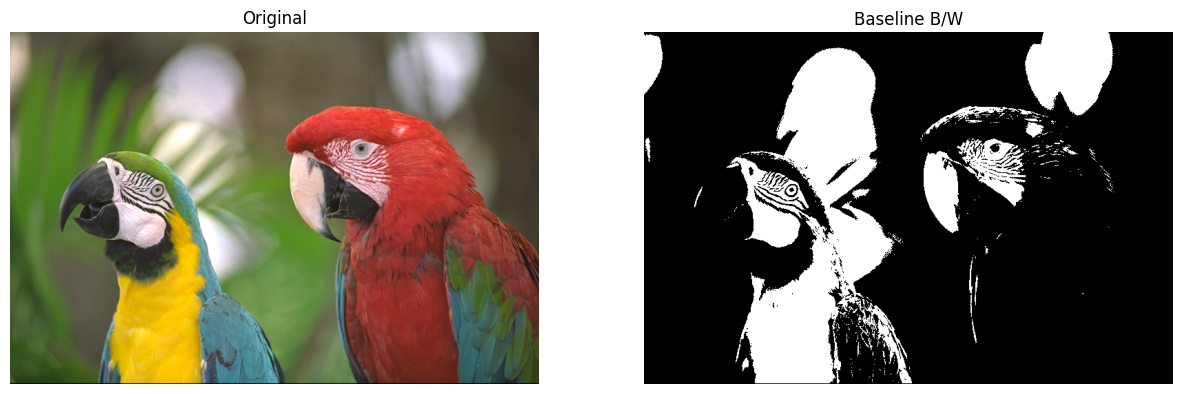

In [28]:
plt.subplot(121); plt.imshow(img.astype(np.uint8)); plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(quantized_bw.astype(np.uint8)); plt.title('Baseline B/W'); plt.axis('off')

In [16]:
img_tmp = np.copy(img)
dither_bw = np.zeros_like(img, dtype=np.float32)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r, c, :]
        diffs = colors_bw - pixel[None, :]
        dists = np.sum(diffs*diffs, axis=1)
        new_pixel = colors_bw[np.argmin(dists)]

        quant_error = pixel - new_pixel

        img_tmp[r,   c+1, :] = np.clip(img_tmp[r,   c+1, :] + quant_error*(7/16.), 0, 255)
        img_tmp[r+1, c-1, :] = np.clip(img_tmp[r+1, c-1, :] + quant_error*(3/16.), 0, 255)
        img_tmp[r+1, c,   :] = np.clip(img_tmp[r+1, c,   :] + quant_error*(5/16.), 0, 255)
        img_tmp[r+1, c+1, :] = np.clip(img_tmp[r+1, c+1, :] + quant_error*(1/16.), 0, 255)

        dither_bw[r, c, :] = new_pixel

In [17]:
avg_dith_error_bw = float(np.mean(np.linalg.norm(img - dither_bw, axis=2)))
print('Avg dithering error (B/W):', avg_dith_error_bw)

Avg dithering error (B/W): 192.33665466308594


(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

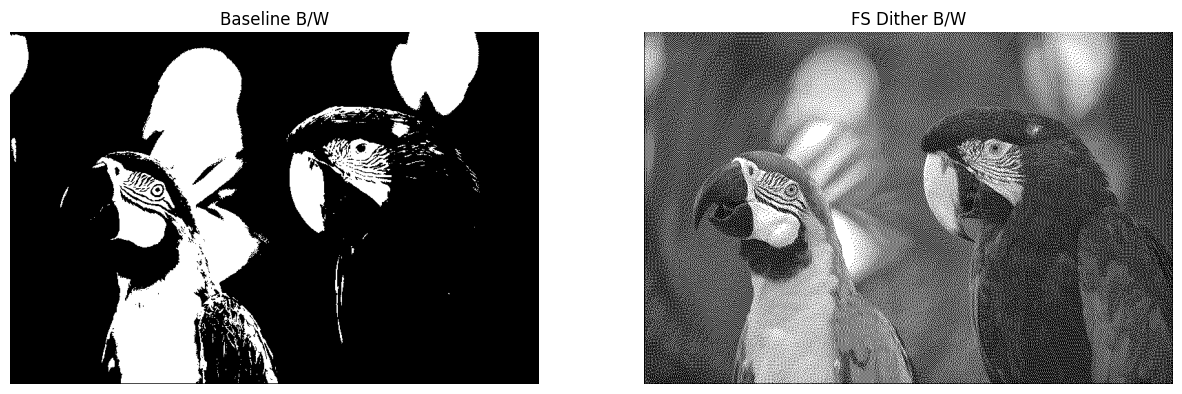

In [31]:
plt.subplot(121); plt.imshow(quantized_bw.astype(np.uint8)); plt.title('Baseline B/W'); plt.axis('off')
plt.subplot(122); plt.imshow(dither_bw.astype(np.uint8)); plt.title('FS Dither B/W'); plt.axis('off')

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [20]:
from sklearn.cluster import KMeans
import cv2

In [21]:
def kmeans_palette(img_f32: np.ndarray, K: int, random_state: int = 42) -> np.ndarray:
    H, W, _ = img_f32.shape
    X = img_f32.reshape(-1, 3)
    km = KMeans(n_clusters=K, n_init='auto', random_state=random_state)
    km.fit(X)
    colors = km.cluster_centers_.astype(np.float32)
    return colors

def quantize_nearest(img_f32: np.ndarray, palette: np.ndarray) -> tuple[np.ndarray, float]:
    H, W, _ = img_f32.shape
    # broadcasting: (H,W,1,3) - (1,1,K,3) -> (H,W,K,3)
    diffs = img_f32[:, :, None, :] - palette[None, None, :, :]
    d2 = np.sum(diffs * diffs, axis=3)              # (H,W,K)
    idx = np.argmin(d2, axis=2)                     # (H,W)
    quant = palette[idx]                            # (H,W,3)
    avg_err = float(np.mean(np.linalg.norm(img_f32 - quant, axis=2)))
    return quant, avg_err

def fs_dither(img_f32: np.ndarray, palette: np.ndarray) -> tuple[np.ndarray, float]:
    H, W, _ = img_f32.shape
    work = img_f32.copy()
    out = np.zeros_like(img_f32, dtype=np.float32)

    for r in range(1, H-1):
        for c in range(1, W-1):
            px = work[r, c, :]
            # nearest in palette
            diffs = palette - px[None, :]
            d2 = np.sum(diffs*diffs, axis=1)
            new_px = palette[np.argmin(d2)]

            err = px - new_px
            # diffuse error (clip to valid range)
            work[r,   c+1, :] = np.clip(work[r,   c+1, :] + err*(7/16.), 0, 255)
            work[r+1, c-1, :] = np.clip(work[r+1, c-1, :] + err*(3/16.), 0, 255)
            work[r+1, c,   :] = np.clip(work[r+1, c,   :] + err*(5/16.), 0, 255)
            work[r+1, c+1, :] = np.clip(work[r+1, c+1, :] + err*(1/16.), 0, 255)

            out[r, c, :] = new_px

    avg_err = float(np.mean(np.linalg.norm(img_f32 - out, axis=2)))
    return out, avg_err


 K = 16 colors
 Avg quantization error  : 17.908292770385742
 Avg dithering error     : 25.99433135986328


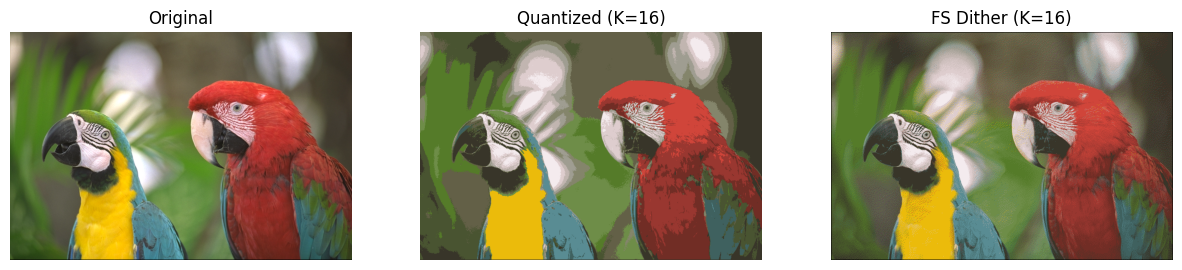


 K = 32 colors
 Avg quantization error  : 13.030669212341309
 Avg dithering error     : 19.649890899658203


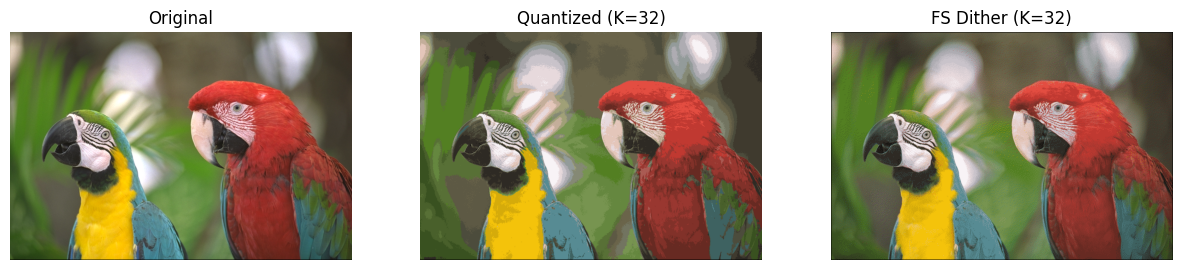


 K = 256 colors
 Avg quantization error  : 5.572477340698242
 Avg dithering error     : 8.922379493713379


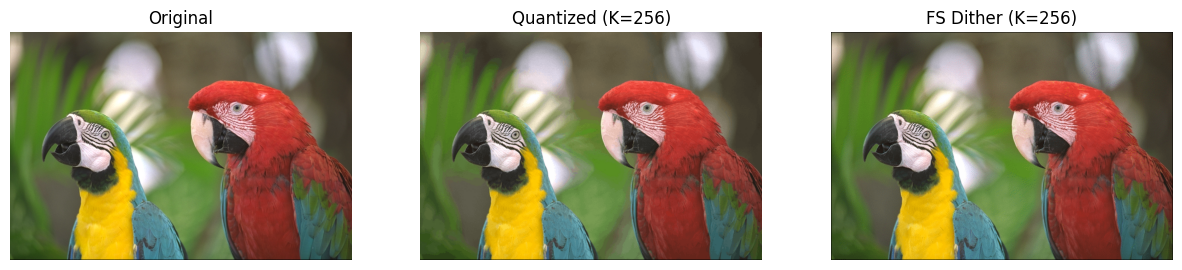

In [32]:
for K in [16, 32, 256]:
    print(f'\n K = {K} colors')
    pal = kmeans_palette(img, K)
    quantK, qeK = quantize_nearest(img, pal)
    ditherK, deK = fs_dither(img, pal)

    print(' Avg quantization error  :', qeK)
    print(' Avg dithering error     :', deK)

    plt.figure(figsize=(15,5))
    plt.subplot(131); plt.imshow(img.astype(np.uint8));      plt.title('Original'); plt.axis('off')
    plt.subplot(132); plt.imshow(quantK.astype(np.uint8));   plt.title(f'Quantized (K={K})'); plt.axis('off')
    plt.subplot(133); plt.imshow(ditherK.astype(np.uint8));  plt.title(f'FS Dither (K={K})'); plt.axis('off')
    plt.show()

Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?